# Well Test Analysis: Reservoir Permeability and Skin Factor Calculator

Importing necessary python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data from a CSV file using the `pd.read_csv()` function from the Pandas library.

This data likely representing measurements taken during a drawdown test in a well, with columns for time and corresponding pressure values.

The `df.head(10)` function displaying the first 10 rows of the DataFrame, giving an initial understanding of the dataset's structure and content.

In [5]:
df=pd.read_csv("C:/Users/shiks/Downloads/Drawdown Test data.csv")

In [7]:
df.head(10)

,time,pressure
0,0.0010,2743.96
1,0.0021,2737.52
2,0.0034,2730.16
3,0.0048,2722.32
4,0.0064,2713.83
5,0.0082,2704.46
6,0.0103,2694.23
7,0.0125,2683.03
8,0.0151,2671.26
9,0.0180,2658.36


In [129]:
#length of dataframe
len(df)

78

In [133]:
#minimum and maximum time in the dataset
np.min(df["time"]),np.max(df["time"])

(0.001, 72.0)

In [135]:
#minimum and maximum pressure in the dataset
np.min(df["pressure"]),np.max(df["pressure"])

(2262.99, 2743.96)

# Cartesian plot 

 The Cartesian plot created using Matplotlib (`plt.plot()`) displays pressure against time, providing a visual
 representation of how pressure changes over the duration of the test. This type of plot helps in understanding the
 general trend of pressure behavior during the test.

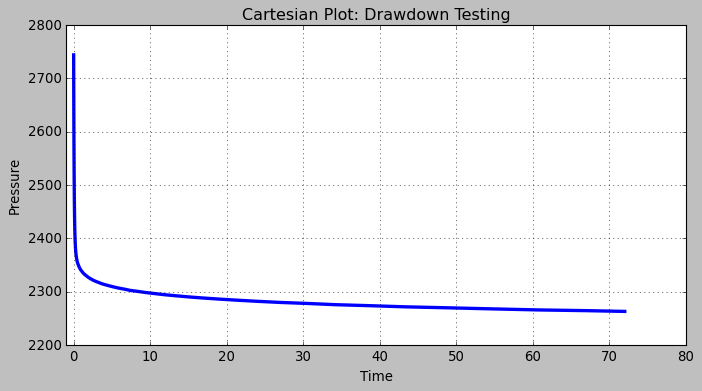

In [142]:
plt.style.use("classic")
plt.figure(figsize=(10,5))
plt.plot(df["time"], df["pressure"], lw=3)
plt.xlabel("Time")
plt.ylabel("Pressure")
plt.title("Cartesian Plot: Drawdown Testing")
plt.grid()

# Adds a small gap before 0 on the x-axis
plt.xlim(left=-1)  # Adjust this value to control the gap size

plt.show()


# Semilog Analysis

 In the semilog plot (`plt.semilogx()`), the x-axis is plotted on a logarithmic scale, which often helps in visualizing
 exponential trends in data. This plot can aid in identifying certain patterns or regimes in the data, such as
 boundary-dominated flow or characteristic time regions

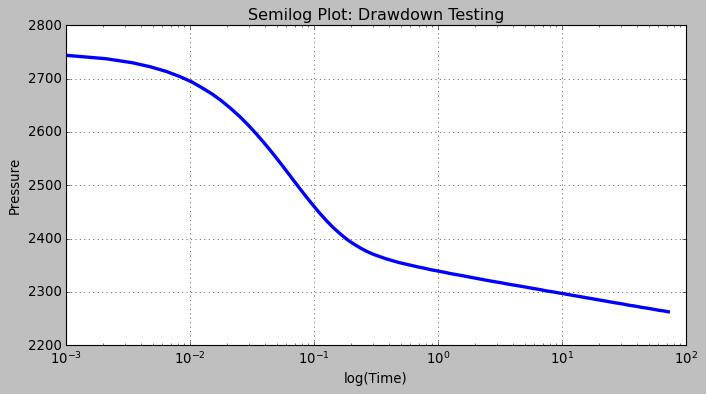

In [23]:
plt.style.use("classic")
plt.figure(figsize=(10,5))
plt.semilogx(df["time"], df["pressure"], lw=3)
plt.xlabel("log(Time)")
plt.ylabel("Pressure")
plt.title("Semilog Plot: Drawdown Testing")
plt.grid()
plt.show()

# Log-Log plot computation

 The log-log plot is crucial for well test analysis. It helps in computing the derivative of pressure with respect to
 time and identifying regions of interest such as the Initial and Middle-Accumulation Region (IARF). The plot is
 created using `plt.loglog()` from Matplotli

 IARF(Infinite Acting Radial Flow): This flow regime assumes the reservoir is so large that well activity is unaffected by its boundaries, with fluid flow radiating outward from the well as if the reservoir extends infinitely.b.

1) Initial pressure= 2760 psi
2) delP=Initial pressure- pressure in data
3) d(delP)=differential pressure=dP
4) dt=differential time
5) Pdash= t* dP/dt

In [41]:
Pi = 2760  # in psi (given)
df["delP"] = np.abs(Pi - df["pressure"])

# np.diff(P) calculates dP (change in pressure)
df["d(delP)"] = np.zeros(len(df))
df["d(delP)"].iloc[1:] = np.abs(np.diff(df["delP"]))  # Start from the second row

df["dt"] = np.zeros(len(df))
df["dt"].iloc[1:] = np.diff(df["time"])  # Start from the second row

# P' (Pdash) = t * dP/dt
df["Pdash"] = np.zeros(len(df))
df["Pdash"].iloc[1:] = df["time"].iloc[1:] * df["d(delP)"].iloc[1:] / df["dt"].iloc[1:]

# Optionally, if you want to set the first row to NaN instead of 0
df["d(delP)"].iloc[0] = 0
df["dt"].iloc[0] = 0
df["Pdash"].iloc[0] = 0


In [45]:
df.head(10)

,time,pressure,delP,d(delP),dt,Pdash
0,0.0010,2743.96,16.04,0.00,0.0000,0.000000
1,0.0021,2737.52,22.48,6.44,0.0011,12.294545
2,0.0034,2730.16,29.84,7.36,0.0013,19.249231
3,0.0048,2722.32,37.68,7.84,0.0014,26.880000
4,0.0064,2713.83,46.17,8.49,0.0016,33.960000
5,0.0082,2704.46,55.54,9.37,0.0018,42.685556
6,0.0103,2694.23,65.77,10.23,0.0021,50.175714
7,0.0125,2683.03,76.97,11.20,0.0022,63.636364
8,0.0151,2671.26,88.74,11.77,0.0026,68.356538
9,0.0180,2658.36,101.64,12.90,0.0029,80.068966


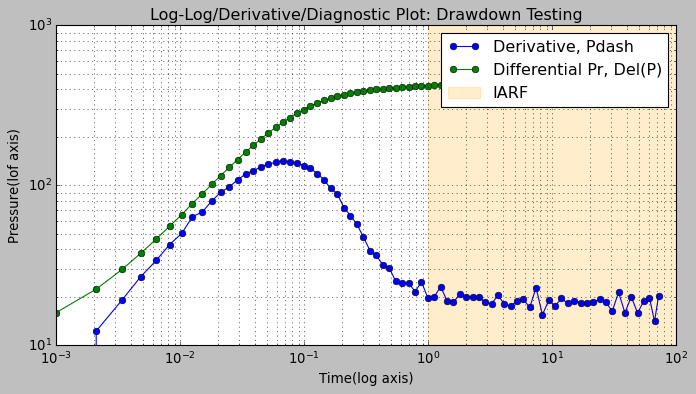

In [53]:
plt.style.use("classic")
plt.figure(figsize=(10,5))

plt.loglog(df["time"],df["Pdash"],marker="o",label="Derivative, Pdash")
plt.loglog(df["time"],df["delP"],marker="o",label="Differential Pr, Del(P)")

plt.axvspan(1,100,color="orange",alpha=0.2,label="IARF")

plt.xlabel("Time(log axis)"); plt.ylabel("Pressure(lof axis)")

plt.title("Log-Log/Derivative/Diagnostic Plot: Drawdown Testing")

plt.legend()
plt.grid(True,which="both")
plt.show()

# Semi log plot for IARF MTR only

 After computing the necessary parameters, a regression analysis is performed to analyze the data within the
 Middle Time Region (MTR) or IARF. This analysis involves fitting a linear regression model to the data points in
 the IARF to determine the slope and intercept of the regression line.

In [63]:
tmin_iarf=1 #in hours
tmax_iarf=50 

In [65]:
df_semilog=df[(df["time"]>tmin_iarf) & (df["time"]<=tmax_iarf)]

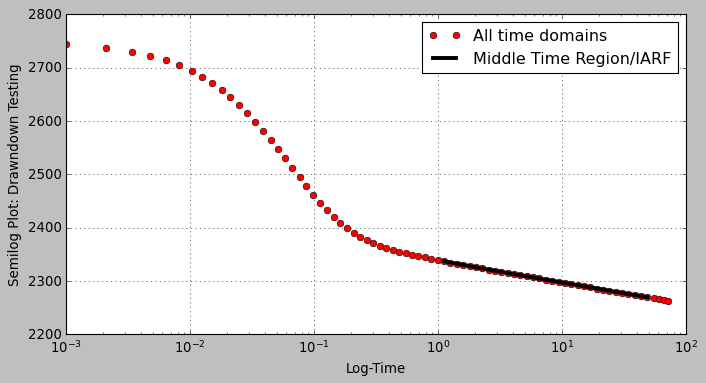

In [69]:
plt.style.use("classic")
plt.figure(figsize=(10,5))

plt.semilogx(df["time"],df["pressure"],'o',color="red",label="All time domains")
plt.semilogx(df_semilog["time"],df_semilog["pressure"],color="black",lw=3.5, label="Middle Time Region/IARF")

plt.xlabel("Log-Time")
plt.ylabel("Semilog Plot: Drawndown Testing")

plt.legend()
plt.grid()
plt.show()

# Permeability Calculation

 With the slope obtained from the linear regression model and known parameters such as flow rate, viscosity, and
 other formation properties, the formation permeability is calculated using a formula that relates these parameters
 to pressure behavior during the test.

Input data

1) Flow rate (q, bbl per day)
2) Fluid viscosity (mue, centipoise)
3) Formation volume factor (B, reservoir bbl/ standard bbl)
4) Reservoir thickness (h, feet)

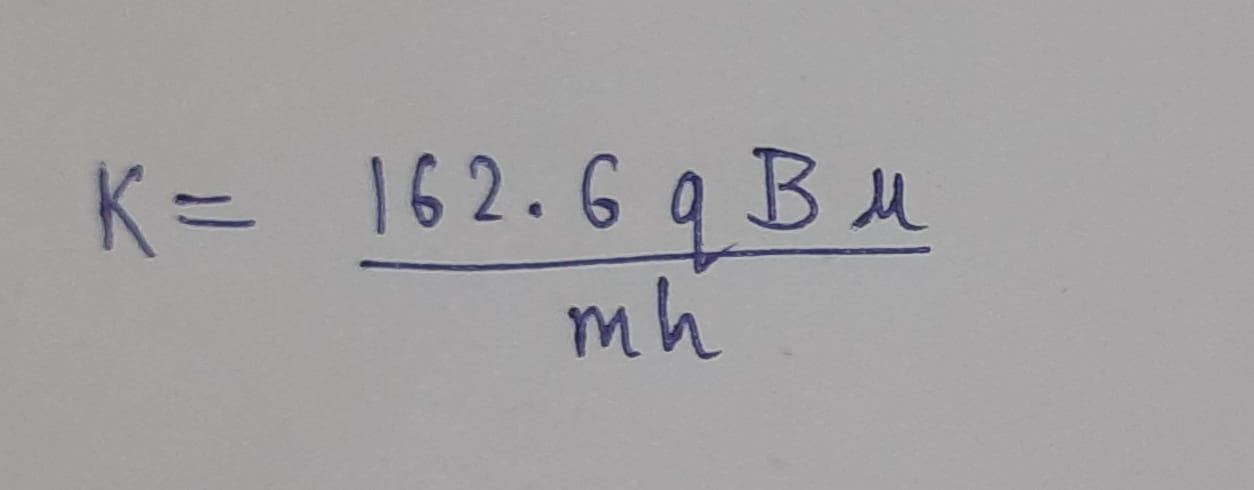

Slope: -17.78693210498953
Intercept: 2338.4291268657103


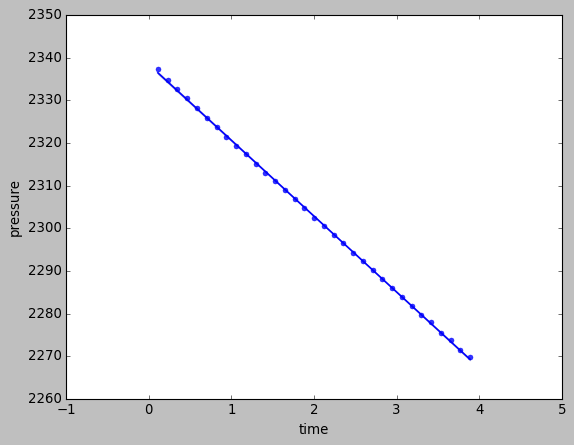

In [149]:
t=np.log(df_semilog["time"])
p=df_semilog["pressure"]
sns.regplot(x=t,y=p)

slope, intercept = np.polyfit(t, p, 1)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

In [151]:
abs(slope)

17.78693210498953

In [153]:
m=abs(slope)

In [155]:
m

17.78693210498953

In [85]:
q=125 #stb/day
mue=2.1 #cp
B=1.14 #rb/stc
h=50 #ft

k=(162.6 *q*mue)/(m*h)
print(f"formation permeability is {np.round(k,3)} mD")

formation permeability is 47.993 mD


# Skin factor calculation

After computing the necessary parameters, a regression analysis is performed to analyze the data within the
 Middle Time Region (MTR) or IARF. This analysis involves fitting a linear regression model to the data points in
 the IARF to determine the slope and intercept of the regression lin


1) Total compressibility of the reservoir, ct (1/psi- inverse pounds per square inch).
2) Wellbore radius, rw (feet).
3) Porosity, phi
4) Pressure at 1 hour, p1hr (psi- pounds per square inch).
5) Initial Reservoir Pressure, pi (psi- pounds per square inch).
6) Slope, m
7) Reservoir Permeability k (miliDarcies).
8) Fluid viscosity mu (cp- centipoise).
 ese).y, fi


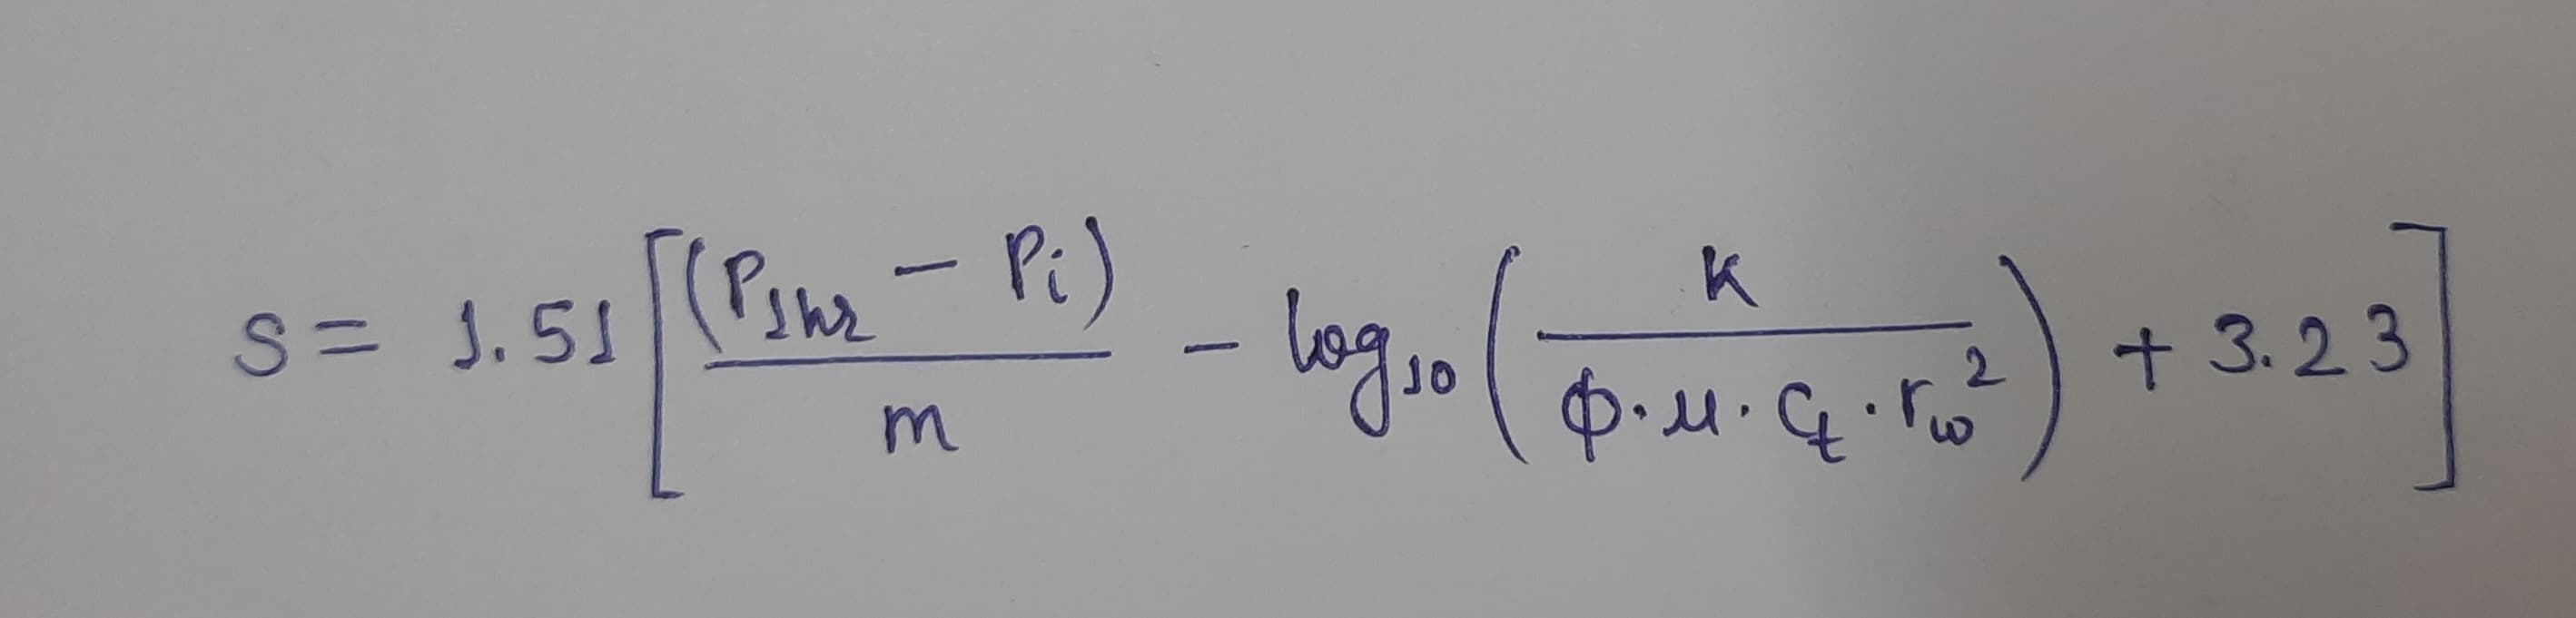

In [175]:
p1hr = 954 
Pi = 1154
m = -22
k = 89
phi = 0.2
mue = 3.93
ct = 8.74 * (10**-6)
rw = 0.25

In [177]:
a=(p1hr - Pi) / m
print(a)


9.090909090909092


In [179]:
b=np.log10(k / (phi * mue * ct * (rw**2)))
print(b)

8.316576010627026


In [181]:
s = 1.51 * (a - b + 3.23)

print(s)

6.04654295122592


## positve skin factor shows wellbore damage